In [1]:
# Importacion de todas las librerias necesarias para la implementacion
# y ejecucion del modelo
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from keras import backend as K
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Leemos el archivo de excel, este archivo contiene todos los datos procesados y listos para 
# ser enviador al modelo. Este cuenta con un total de 749 registros y 6 columnas
# que corresponden a la personalidad.
datos = pd.read_excel("DatosLimpios_2Y.xlsx", names=['Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
datos

,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,1,0,0,0,0,1
6,0,0,0,1,0,1
11,0,0,0,0,1,1
12,0,0,0,0,1,1
13,1,0,0,0,0,1
...,...,...,...,...,...,...
2197,0,0,0,1,0,0
2200,0,1,0,0,0,0
2201,1,0,0,0,0,1
2204,1,0,0,0,0,1


In [3]:
# Se realiza la separacion de los datos de entrada y los datos de salida
# Para los datos de entrada se toman todas las columnas a expecion de la ulimta
# que corresponde a la columna de estilo, y para los datos de salida se unicamente
#  toma la columna de estilo.
datos = datos.values
X = datos[:, :-1]
y = datos[:,-1]

In [4]:
# Se dividen los datos en 2 partes, el 70% para el entrenamiento del modelo
# y el 30% para las pruebas y evaluacion del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [5]:
# Se establece el modelo de regresion logistica estableciendo algunos 
# hiperparametros
logreg = LogisticRegression(C= 1,max_iter=300, tol=0.0001)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=300)

In [6]:
# Se obtienen y se guardan las variables de prediccion ademas
# de devolver el acurracy del modelo
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

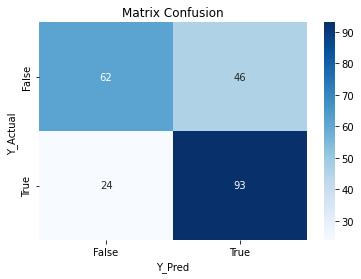

In [7]:
# Mediante una matriz de confusion obtenemos todos los verdaderos y negativos
confusion_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
# Colocamos las etiquetas de X e Y
ax.set_title('Matrix Confusion');
ax.set_xlabel('Y_Pred')
ax.set_ylabel('Y_Actual ');

# Establecemos las sub etiquetas de X e Y
ax.xaxis.set_ticklabels(["False","True"])
ax.yaxis.set_ticklabels(["False","True"])

In [8]:
# Sacamos un reporte de clasificacion del modelo, este devolvera los valores
# de precision, recall, f1, entre otros.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.64       108
           1       0.67      0.79      0.73       117

    accuracy                           0.69       225
   macro avg       0.69      0.68      0.68       225
weighted avg       0.69      0.69      0.68       225

